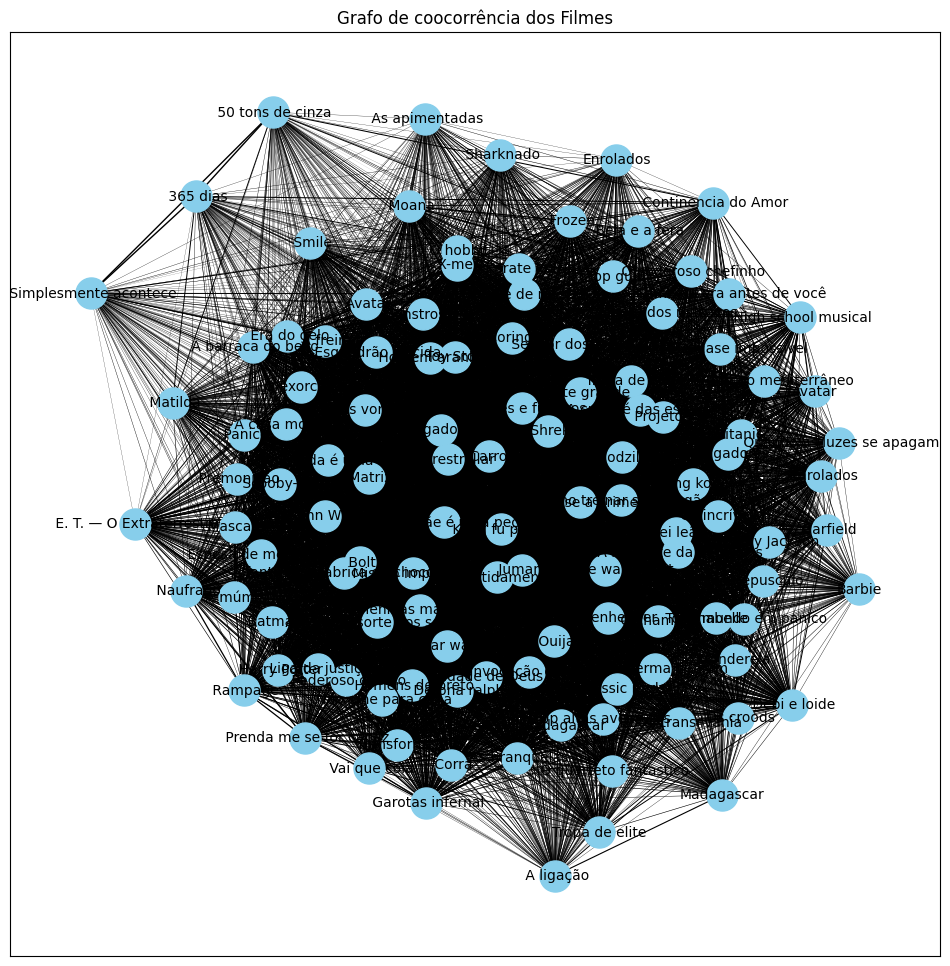

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

caminho_arquivo_excel = r"Dados_grafosXLSX.xlsx"#colocar o caminho do arquivo .xlsx

dataframe = pd.read_excel(caminho_arquivo_excel, engine='openpyxl')

caminho_arquivo_csv = r"Grafos_Dados.csv"#colocar o caminho do arquivo .csv

dataframe.to_csv(caminho_arquivo_csv, index=False)

leitura_csv = pd.read_csv(caminho_arquivo_csv)

filmes_separados = leitura_csv['Filmes'].str.split(',', expand=True)
filmes_separados.name = 'Filmes'

dataframe = leitura_csv.drop('Filmes', axis=1).join(filmes_separados)

todos_filmes = filmes_separados.stack().unique()

matriz_coocorrencia = pd.DataFrame(0, index=todos_filmes, columns=todos_filmes)

for filmes in filmes_separados.values:
    filmes = [f for f in filmes if f]
    for i, filme1 in enumerate(filmes):
        for filme2 in filmes[i:]:
            matriz_coocorrencia.at[filme1, filme2] += 1
            if filme1 != filme2:
                matriz_coocorrencia.at[filme2, filme1] += 1

similaridade_cosseno = cosine_similarity(matriz_coocorrencia)

matriz_similaridade = pd.DataFrame(similaridade_cosseno, index=todos_filmes, columns=todos_filmes)

G = nx.Graph()

for filme in todos_filmes:
    G.add_node(filme)

for i, filme1 in enumerate(todos_filmes):
    for j, filme2 in enumerate(todos_filmes):
        if i < j:
            peso = matriz_similaridade.at[filme1, filme2]
            if peso > 0:
                G.add_edge(filme1, filme2, weight=peso)

pos = nx.spring_layout(G, k=0.15, iterations=20)
plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (u, v, d) in edges])

nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Grafo de coocorrência dos Filmes')
plt.show()
